In [1]:
a=5
print(a)

5


In [2]:
import numpy as np


In [3]:
np.pi

3.141592653589793

In [4]:
import pandas as pd

In [5]:
data = pd.read_csv("./data_SNat/BRGM_Mayotte_2018.txt",delimiter = "\t")
print(data.head())

          sec           p0            p1     p2   mag
0  3735155991  567319.9369  8.598171e+06  10000  3.97
1  3735177828  583643.5591  8.610293e+06      0  3.88
2  3735204075  587944.4743  8.595903e+06  10000  4.30
3  3735347280  570563.6804  8.592634e+06  10000  4.60
4  3735432720  572720.6826  8.587099e+06  10000  4.77


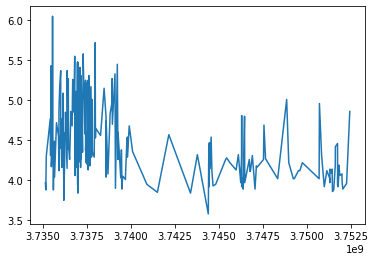

In [6]:
import matplotlib.pyplot as plt
plt.plot(data['sec'],data['mag'])
plt.show()

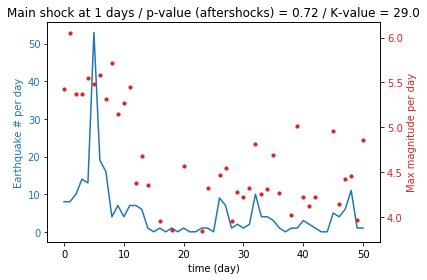

-0.7150780435754045
1.4653460502504292
1


In [7]:
from Codes_Graphes.OmoriUtsu import GraphOmoriUtsu,RegressionOU,RegressionOU_foreshock
a, b, idx_ms = GraphOmoriUtsu(data, 3600*24*4, 1, 1, 0)
print(a)
print(b)
print(idx_ms)


In [8]:
gap = 3600*24*4
nb_gap = int((data['sec'].max() - data['sec'].min()) // gap)
nt = []
magmax = []
title = 'Earthquake number and maximal magnitude per day'

for i in range(nb_gap + 1):
    dfbis = data[((i * gap + data['sec'].min()) <= data['sec']) & (((i + 1) * gap + data['sec'].min()) > data['sec'])]
    nt.append(len(dfbis))
    magmax.append(dfbis['mag'].max())

print(magmax)
print(nt)

[5.43, 6.05, 5.37, 5.37, 5.55, 5.48, 5.58, 5.31, 5.72, 5.15, 5.27, 5.45, 4.38, 4.68, 4.36, nan, 3.95, nan, 3.85, nan, 4.57, nan, nan, 3.84, 4.32, nan, 4.47, 4.54, 3.95, 4.28, 4.22, 4.32, 4.81, 4.26, 4.31, 4.69, 4.27, nan, 4.02, 5.01, 4.22, 4.12, 4.22, nan, nan, 4.96, 4.14, 4.42, 4.46, 3.96, 4.86]
[8, 8, 10, 14, 13, 53, 19, 16, 4, 7, 4, 7, 7, 6, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 9, 7, 1, 2, 1, 2, 10, 4, 4, 3, 1, 0, 1, 1, 3, 2, 1, 0, 0, 5, 4, 6, 11, 1, 1]


In [9]:
data = pd.read_csv("./data_SNat/CDSA_SeulementEssaimSaintes_2004-2005.txt",delimiter = "\t")
print(data.head())
print(data.iloc[[1]] )
first = data[data['sec'] == data['sec'].min()]
print(float(first['mag']))

            sec           p0            p1        p2   mag
0  3.345210e+09  647715.5545  1.751604e+06  8536.377  2.62
1  3.345210e+09  647246.2258  1.753006e+06  6107.910  1.49
2  3.345185e+09  654089.6093  1.751952e+06  2043.457  1.32
3  3.345003e+09  645922.8270  1.753510e+06  2003.906  1.04
4  3.345002e+09  645149.5431  1.753267e+06  8415.039  1.80
            sec           p0            p1       p2   mag
1  3.345210e+09  647246.2258  1.753006e+06  6107.91  1.49
3.05


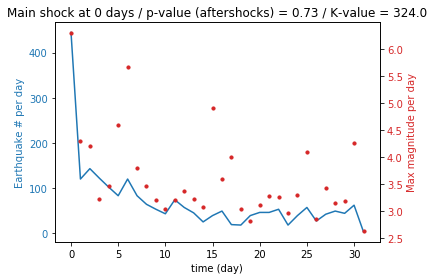

(-0.7303943607048005, 2.5100681712562873, 0)

In [10]:
GraphOmoriUtsu(data, 3600*24*13, 1, 1, 0)

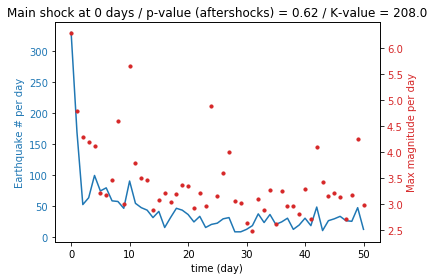

(-0.6230424774059395, 2.318649357804776, 0)

In [11]:
GraphOmoriUtsu(data, 3600*24*8, 1, 1, 0)

In [12]:
def findFirstSeisme(dataset):
    firstSeisme = dataset[dataset['sec'] == dataset['sec'].min()]
    return firstSeisme

In [13]:
def getDeltaT(dataset,currentLine):
    timeDF = dataset['sec']
    currentTime = currentLine['sec']
    deltaT = timeDF.apply(lambda x : int(x)-int(currentLine['sec']))
    return deltaT

#Test 1 

deltaT = getDeltaT(data, data[data['sec'] == data['sec'].min()]) 

print(max(deltaT))
print(float(deltaT.iloc[[0]])<=float(deltaT.iloc[[0]]))
#print(data[data['sec'] == data['sec'].max()]['sec'])
#print(data['sec'][0])
#print(data[data['sec'] == data['sec'].min()]['sec'])



35011652
True


In [14]:
def getDist(point1, point2):
    return 1

def getDeltaDist(dataset,currentLine):
    coordDF = dataset[['p0','p1','p2']]
    currentCoord = currentLine[['p0','p1','p2']]
    
    #def dist(x):
    #    return dist(x)
    #deltaDist = coordDF.apply(dist)
    #print("deltaDist")
    #print(deltaDist)
    return dataset[['p0']]

#Test 1

print(data[['p0','p1','p2']])


               p0            p1         p2
0     647715.5545  1.751604e+06   8536.377
1     647246.2258  1.753006e+06   6107.910
2     654089.6093  1.751952e+06   2043.457
3     645922.8270  1.753510e+06   2003.906
4     645149.5431  1.753267e+06   8415.039
...           ...           ...        ...
2224  679952.2677  1.753681e+06  10085.449
2225  644548.2598  1.743090e+06  27900.000
2226  648250.3660  1.750398e+06  35000.000
2227  662797.8692  1.744543e+06  12886.963
2228  662303.4728  1.744292e+06  13908.691

[2229 rows x 3 columns]


In [15]:
def getDeltaMag(dataset, currentLine):
    magDF = dataset['mag']
    currentMag = currentLine['mag']
    deltaMag = magDF.apply(lambda x : abs(float(x)-float(currentLine['mag'])))
    return deltaMag

In [16]:
def getCorrectChilds(dataset, currentSeisme,maxDeltaT, maxDeltaDist, maxDeltaMag):
    deltaT = getDeltaT(dataset,currentSeisme)
    deltaDist = getDeltaMag(dataset,currentSeisme)
    deltaMag = getDeltaMag(dataset,currentSeisme)
    correctChilds = []
    for i in range(min(len(deltaT),len(deltaDist),len(deltaMag))):
        if (0<float(deltaT.iloc[[i]])<=maxDeltaT and float(deltaDist.iloc[[i]])<=maxDeltaDist and float(deltaMag.iloc[[i]])<=maxDeltaMag):
            correctChilds.append(dataset.iloc[[i]])
    return correctChilds

In [17]:
def DFS(root,dataset,maxDeltaT, maxDeltaDist, maxDeltaMag):
    if root.children == []:
        print("end of branch")
    else :
        for child in root.children:
            childChilds = getCorrectChilds(dataset,child.data,maxDeltaT, maxDeltaDist, maxDeltaMag)
            for j in range(len(childChilds)): 
                child.children.append(Tree(childChilds[j]))
            DFS(child,dataset,maxDeltaT, maxDeltaDist, maxDeltaMag)


In [18]:
class Tree:
    def __init__(self, data):
        self.children = []
        self.data = data
        print("new tree "+str(data))
    

        
    
tree = Tree(data[data['sec'] == data['sec'].min()])
root = tree
tree.children.append(Tree(data[data['sec'] == data['sec'].max()]))
tree.children.append(5)
print(tree.data)
print(tree.children[0].data)
print(root.children[0].data)


new tree                sec           p0            p1         p2   mag
2228  3.310199e+09  662303.4728  1.744292e+06  13908.691  3.05
new tree             sec           p0            p1        p2   mag
0  3.345210e+09  647715.5545  1.751604e+06  8536.377  2.62
               sec           p0            p1         p2   mag
2228  3.310199e+09  662303.4728  1.744292e+06  13908.691  3.05
            sec           p0            p1        p2   mag
0  3.345210e+09  647715.5545  1.751604e+06  8536.377  2.62
            sec           p0            p1        p2   mag
0  3.345210e+09  647715.5545  1.751604e+06  8536.377  2.62


In [19]:
!pip install anytree

from anytree import Node, RenderTree
udo = Node(data[data['sec'] == data['sec'].min()])
marc = Node("Marc", parent=udo)
lian = Node("Lian", parent=marc)
dan = Node("Dan", parent=udo)
jet = Node("Jet", parent=dan)
jan = Node("Jan", parent=dan)
joe = Node("Joe", parent=dan)

for pre, fill, node in RenderTree(udo):
    print("%s%s" % (pre, node.name))

!pip install graphviz
from anytree.exporter import DotExporter
# graphviz needs to be installed for the next line!

DotExporter(udo).to_picture("udo.png")

You should consider upgrading via the '/home/timon/anaconda3/bin/python -m pip install --upgrade pip' command.
               sec           p0            p1         p2   mag
2228  3.310199e+09  662303.4728  1.744292e+06  13908.691  3.05
├── Marc
│   └── Lian
└── Dan
    ├── Jet
    ├── Jan
    └── Joe
You should consider upgrading via the '/home/timon/anaconda3/bin/python -m pip install --upgrade pip' command.


In [ ]:
#HERE we base ourselves on 3 delta which is pretty restritive 
#MAYBE normalising and multiplying them is a better option
def createTree(maxDeltaT, maxDeltaDist, maxDeltaMag, dataset):
    firstSeisme = findFirstSeisme(dataset)
    root = Tree(firstSeisme)
    #First Step (not really essential but better to understand the Deep First Search)
    correctChilds = getCorrectChilds(dataset, firstSeisme,maxDeltaT, maxDeltaDist, maxDeltaMag)
    for j in range(len(correctChilds)): 
        root.children.append(Tree(correctChilds[i]))
        
    #Recursion Step => DFS
    DFS(root,dataset,maxDeltaT, maxDeltaDist, maxDeltaMag)
    return root

tree = createTree(10000000, 2000000, 10000000, data)
print(tree.data)

new tree                sec           p0            p1         p2   mag
2228  3.310199e+09  662303.4728  1.744292e+06  13908.691  3.05
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   

new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   ma

new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   ma

new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   ma

new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   ma

new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   ma

new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   ma

new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   ma

new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   ma

new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   ma

new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   ma

new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   ma

new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   ma

new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   ma

new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   ma

new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree                sec           p0            p1        p2   mag
1000  3.319438e+09  656831.3606  1.738519e+06  7580.566  2.98
new tree               sec           p0            p1         p2  mag

new tree               sec         p0            p1         p2   mag
634  3.327385e+09  650309.52  1.756336e+06  15490.723  1.84
new tree               sec          p0            p1        p2   mag
635  3.327367e+09  647938.298  1.748711e+06  2043.457  2.67
new tree               sec           p0            p1        p2   mag
636  3.327284e+09  645271.8652  1.751559e+06  3339.355  2.07
new tree               sec           p0            p1       p2   mag
637  3.327282e+09  656333.2649  1.749129e+06  494.385  2.15
new tree               sec           p0            p1         p2   mag
638  3.327266e+09  660356.4776  1.746732e+06  16380.615  2.22
new tree               sec           p0           p1       p2   mag
639  3.327260e+09  651287.7659  1750581.495  6822.51  1.95
new tree               sec           p0            p1       p2   mag
640  3.327248e+09  646615.0498  1.751320e+06  2603.76  2.38
new tree               sec           p0            p1        p2   mag
641  3.327217e+09  6523

new tree               sec           p0            p1       p2   mag
749  3.324218e+09  643957.7906  1.755464e+06  131.836  1.65
new tree               sec           p0            p1       p2   mag
750  3.324218e+09  647409.8077  1.750633e+06  11410.0  3.36
new tree               sec           p0            p1        p2   mag
751  3.324210e+09  654388.2621  1.751293e+06  2043.457  1.82
new tree               sec           p0            p1      p2   mag
752  3.324191e+09  649091.7574  1.749298e+06  32.959  1.86
new tree               sec           p0            p1         p2   mag
753  3.324168e+09  646173.9957  1.751317e+06  13546.143  2.51
new tree               sec           p0            p1        p2   mag
754  3.324157e+09  650112.6702  1.753027e+06  7844.238  2.16
new tree               sec           p0            p1        p2   mag
755  3.324153e+09  642139.9561  1.752694e+06  9074.219  1.43
new tree               sec           p0           p1         p2   mag
756  3.324153e+09  

new tree               sec           p0            p1        p2   mag
813  3.323193e+09  647425.8177  1.768996e+06  5734.863  2.34
new tree               sec           p0            p1        p2   mag
814  3.323157e+09  665413.3337  1.752456e+06  2953.125  1.75
new tree               sec           p0            p1       p2   mag
815  3.323127e+09  637981.0702  1.748364e+06  131.836  1.51
new tree               sec           p0            p1         p2   mag
816  3.323121e+09  651191.2645  1.748651e+06  12491.455  1.84
new tree               sec           p0            p1      p2   mag
817  3.323112e+09  648884.8779  1.754331e+06  9080.0  1.83
new tree               sec           p0            p1         p2   mag
818  3.323097e+09  650984.4182  1.749352e+06  16716.797  2.69
new tree               sec           p0            p1        p2   mag
819  3.323081e+09  633738.5907  1.745468e+06  6987.305  2.97
new tree               sec           p0            p1        p2   mag
820  3.323062e+

new tree               sec           p0            p1         p2   mag
906  3.320956e+09  647504.8867  1.763097e+06  15138.672  1.89
new tree               sec           p0            p1         p2   mag
907  3.320956e+09  650432.1175  1.764882e+06  16193.359  1.97
new tree               sec           p0            p1         p2   mag
908  3.320865e+09  648405.4738  1.750203e+06  10524.414  1.51
new tree               sec           p0           p1        p2   mag
909  3.320858e+09  640449.2247  1763046.762  2373.047  2.06
new tree               sec           p0            p1      p2   mag
910  3.320856e+09  640388.5779  1.754368e+06  6680.0  1.31
new tree               sec           p0            p1         p2  mag
911  3.320846e+09  649587.9126  1.740768e+06  16822.266  2.1
new tree               sec           p0            p1        p2   mag
912  3.320846e+09  654421.4836  1.751789e+06  5514.648  1.68
new tree               sec           p0           p1      p2   mag
913  3.320838e+0

new tree               sec           p0            p1         p2   mag
985  3.319594e+09  649787.7303  1.749634e+06  14666.748  2.31
new tree               sec         p0            p1        p2   mag
986  3.319593e+09  644995.35  1.767131e+06  7679.443  2.65
new tree               sec           p0            p1         p2   mag
987  3.319567e+09  652829.9504  1.761068e+06  15655.518  2.14
new tree               sec           p0            p1         p2   mag
988  3.319564e+09  644984.8232  1.748000e+06  16710.205  2.14
new tree               sec          p0            p1         p2   mag
989  3.319555e+09  657984.967  1.739106e+06  13282.471  2.59
new tree               sec           p0            p1        p2   mag
990  3.319545e+09  656696.2769  1.728202e+06  8015.625  2.36
new tree               sec           p0            p1         p2   mag
991  3.319539e+09  651882.7048  1.749531e+06  21304.688  2.12
new tree               sec           p0            p1       p2   mag
992  3.319

new tree               sec           p0            p1        p2  mag
355  3.335926e+09  648950.0259  1.751144e+06  8898.926  2.3
new tree               sec           p0            p1        p2   mag
356  3.335866e+09  655874.0246  1.749098e+06  2020.996  2.18
new tree               sec           p0            p1        p2   mag
357  3.335866e+09  656827.2182  1.749436e+06  1120.605  2.16
new tree               sec           p0            p1        p2   mag
358  3.335863e+09  646591.0603  1.754683e+06  6690.674  2.33
new tree               sec           p0            p1        p2   mag
359  3.335862e+09  646411.6828  1.754075e+06  7745.361  2.79
new tree               sec          p0            p1        p2   mag
360  3.335813e+09  646472.479  1.753276e+06  7514.648  1.93
new tree               sec           p0            p1       p2   mag
361  3.335805e+09  639162.4246  1.757966e+06  527.344  2.08
new tree               sec           p0            p1         p2   mag
362  3.335778e+09 

new tree               sec           p0            p1        p2   mag
434  3.334008e+09  646813.0525  1.751900e+06  9799.316  1.81
new tree               sec           p0            p1         p2   mag
435  3.333991e+09  652042.0183  1.760759e+06  15754.395  1.83
new tree               sec           p0            p1        p2  mag
436  3.333943e+09  650699.0475  1.753251e+06  3625.488  1.5
new tree               sec           p0            p1    p2  mag
437  3.333867e+09  640612.0538  1.761414e+06 -10.0  1.9
new tree               sec           p0            p1        p2   mag
438  3.333846e+09  646664.4555  1.752120e+06  8085.449  1.89
new tree               sec          p0            p1        p2   mag
439  3.333800e+09  644602.391  1.744910e+06  6624.756  3.27
new tree               sec           p0            p1        p2   mag
440  3.333783e+09  646320.4417  1.748809e+06  1911.621  2.76
new tree               sec           p0            p1        p2   mag
441  3.333760e+09  646630

new tree               sec           p0            p1        p2   mag
531  3.331186e+09  648865.0515  1.750178e+06  8800.049  2.64
new tree               sec           p0            p1         p2   mag
532  3.331180e+09  650120.0042  1.755452e+06  12972.656  1.75
new tree               sec           p0            p1        p2   mag
533  3.331063e+09  648773.8673  1.752659e+06  6338.623  1.79
new tree               sec           p0            p1      p2   mag
534  3.331063e+09  648614.2192  1.754771e+06  7770.0  1.94
new tree               sec           p0            p1        p2   mag
535  3.330779e+09  648228.3828  1.749264e+06  1647.949  1.83
new tree               sec           p0           p1       p2   mag
536  3.330777e+09  649263.0027  1751063.326  823.975  2.26
new tree               sec          p0           p1        p2   mag
537  3.330750e+09  649586.157  1749549.406  1713.867  1.56
new tree               sec           p0            p1        p2  mag
538  3.330729e+09  64815

new tree              sec           p0            p1        p2   mag
74  3.343738e+09  647180.5172  1.751903e+06  9535.645  1.56
new tree              sec           p0            p1        p2   mag
75  3.343727e+09  649991.6136  1.749387e+06  7953.613  1.86
new tree              sec           p0            p1      p2   mag
76  3.343658e+09  646666.6956  1.755072e+06  8360.0  1.92
new tree              sec           p0            p1         p2   mag
77  3.343652e+09  650705.3951  1.752369e+06  10349.121  1.56
new tree              sec           p0            p1        p2   mag
78  3.343603e+09  645737.4898  1.753271e+06  9887.695  2.98
new tree              sec           p0            p1         p2   mag
79  3.343602e+09  645026.5136  1.752467e+06  11568.604  3.18
new tree              sec           p0            p1        p2   mag
80  3.343543e+09  642992.6791  1.751653e+06  3075.684  1.65
new tree              sec           p0            p1      p2   mag
81  3.343543e+09  643626.5464 

new tree               sec          p0            p1        p2  mag
151  3.341748e+09  646018.914  1.755037e+06  1977.539  1.7
new tree               sec           p0            p1        p2   mag
152  3.341747e+09  654016.6288  1.746714e+06  9360.352  1.96
new tree               sec           p0            p1      p2   mag
153  3.341732e+09  643835.0635  1.754095e+06  4520.0  2.12
new tree               sec           p0            p1      p2  mag
154  3.341704e+09  645463.3809  1.755640e+06  65.918  1.8
new tree               sec           p0            p1        p2   mag
155  3.341683e+09  645128.1288  1.753680e+06  3394.775  2.13
new tree               sec           p0            p1        p2   mag
156  3.341660e+09  650609.5715  1.765045e+06  9861.328  1.77
new tree               sec           p0            p1        p2   mag
157  3.341656e+09  649446.9453  1.748446e+06  5141.602  2.33
new tree               sec           p0            p1        p2  mag
158  3.341640e+09  642201.40

end of branch
new tree             sec           p0            p1        p2   mag
0  3.345210e+09  647715.5545  1.751604e+06  8536.377  2.62
end of branch
new tree             sec           p0            p1        p2   mag
0  3.345210e+09  647715.5545  1.751604e+06  8536.377  2.62
new tree             sec           p0            p1       p2   mag
1  3.345210e+09  647246.2258  1.753006e+06  6107.91  1.49
end of branch
new tree             sec           p0            p1        p2   mag
0  3.345210e+09  647715.5545  1.751604e+06  8536.377  2.62
end of branch
new tree             sec           p0            p1        p2   mag
0  3.345210e+09  647715.5545  1.751604e+06  8536.377  2.62
new tree             sec           p0            p1       p2   mag
1  3.345210e+09  647246.2258  1.753006e+06  6107.91  1.49
new tree             sec           p0            p1        p2   mag
2  3.345185e+09  654089.6093  1.751952e+06  2043.457  1.32
end of branch
new tree             sec           p0        

end of branch
new tree             sec           p0            p1        p2   mag
0  3.345210e+09  647715.5545  1.751604e+06  8536.377  2.62
end of branch
new tree             sec           p0            p1        p2   mag
0  3.345210e+09  647715.5545  1.751604e+06  8536.377  2.62
new tree             sec           p0            p1       p2   mag
1  3.345210e+09  647246.2258  1.753006e+06  6107.91  1.49
end of branch
new tree             sec           p0            p1        p2   mag
0  3.345210e+09  647715.5545  1.751604e+06  8536.377  2.62
end of branch
new tree             sec           p0            p1        p2   mag
0  3.345210e+09  647715.5545  1.751604e+06  8536.377  2.62
new tree             sec           p0            p1       p2   mag
1  3.345210e+09  647246.2258  1.753006e+06  6107.91  1.49
new tree             sec           p0            p1        p2   mag
2  3.345185e+09  654089.6093  1.751952e+06  2043.457  1.32
end of branch
new tree             sec           p0        

end of branch
new tree             sec           p0            p1        p2   mag
0  3.345210e+09  647715.5545  1.751604e+06  8536.377  2.62
end of branch
new tree             sec           p0            p1        p2   mag
0  3.345210e+09  647715.5545  1.751604e+06  8536.377  2.62
new tree             sec           p0            p1       p2   mag
1  3.345210e+09  647246.2258  1.753006e+06  6107.91  1.49
end of branch
new tree             sec           p0            p1        p2   mag
0  3.345210e+09  647715.5545  1.751604e+06  8536.377  2.62
end of branch
new tree             sec           p0            p1        p2   mag
0  3.345210e+09  647715.5545  1.751604e+06  8536.377  2.62
new tree             sec           p0            p1       p2   mag
1  3.345210e+09  647246.2258  1.753006e+06  6107.91  1.49
new tree             sec           p0            p1        p2   mag
2  3.345185e+09  654089.6093  1.751952e+06  2043.457  1.32
end of branch
new tree             sec           p0        